In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("../data/playlists.csv", delimiter=";", index_col=0).reset_index()
print("Shape of data:", df.shape) # Raw data has in total 12667 rows and 26 cols
print("Number of unique playlist id: ", str(len(df['playlist_id'].unique())))  # Confirm the playlist is unique, data clean

Shape of data: (12667, 26)
Number of unique playlist id:  12667


In [3]:
df.dtypes # the followed_by is marked with object instead of numeric

playlist_id                      object
name                             object
followed_by                      object
acousticness_avg                float64
acousticness_stdev              float64
artist_followers_avg              int64
artist_followers_stdev          float64
danceability_avg                float64
danceability_stdev              float64
duration_ms_avg                 float64
duration_ms_stdev               float64
energy_avg                      float64
energy_stdev                    float64
instrumentalness_avg            float64
instrumentalness_stdev          float64
liveness_avg                    float64
liveness_stdev                  float64
mode_avg                        float64
mode_stdev                      float64
num_unique_artist_first_page    float64
speechiness_avg                 float64
speechiness_stdev               float64
tempo_avg                       float64
tempo_stdev                     float64
valence_avg                     float64


In [4]:
df[['followed_by']] = df[['followed_by']].apply(pd.to_numeric, errors='coerce') # force type change

In [5]:
df.isna().sum() # noticed that name column has the most null value...

playlist_id                       0
name                            220
followed_by                       1
acousticness_avg                  0
acousticness_stdev                0
artist_followers_avg              0
artist_followers_stdev            0
danceability_avg                  0
danceability_stdev                0
duration_ms_avg                   0
duration_ms_stdev                 0
energy_avg                        0
energy_stdev                      1
instrumentalness_avg              1
instrumentalness_stdev            1
liveness_avg                      2
liveness_stdev                    2
mode_avg                          2
mode_stdev                        2
num_unique_artist_first_page      2
speechiness_avg                   2
speechiness_stdev                 2
tempo_avg                         2
tempo_stdev                       2
valence_avg                       2
valence_stdev                     2
dtype: int64

In [6]:
df["name"]= df["name"].fillna("NameEmpty") # Fille na value in name col

In [7]:
df = df.dropna()
df.count()

playlist_id                     12665
name                            12665
followed_by                     12665
acousticness_avg                12665
acousticness_stdev              12665
artist_followers_avg            12665
artist_followers_stdev          12665
danceability_avg                12665
danceability_stdev              12665
duration_ms_avg                 12665
duration_ms_stdev               12665
energy_avg                      12665
energy_stdev                    12665
instrumentalness_avg            12665
instrumentalness_stdev          12665
liveness_avg                    12665
liveness_stdev                  12665
mode_avg                        12665
mode_stdev                      12665
num_unique_artist_first_page    12665
speechiness_avg                 12665
speechiness_stdev               12665
tempo_avg                       12665
tempo_stdev                     12665
valence_avg                     12665
valence_stdev                   12665
dtype: int64

In [8]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.describe()


,followed_by,acousticness_avg,acousticness_stdev,artist_followers_avg,artist_followers_stdev,danceability_avg,danceability_stdev,duration_ms_avg,duration_ms_stdev,energy_avg,...,liveness_stdev,mode_avg,mode_stdev,num_unique_artist_first_page,speechiness_avg,speechiness_stdev,tempo_avg,tempo_stdev,valence_avg,valence_stdev
count,1.266500e+04,12665.000000,12665.000000,1.266500e+04,1.266500e+04,12665.000000,12665.000000,1.266500e+04,1.266500e+04,12665.000000,...,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000,12665.000000
mean,6.950190e+04,0.252351,0.201773,2.984677e+06,5.912902e+06,0.630767,0.124348,2.190073e+05,5.257556e+04,0.646204,...,0.134978,0.590388,0.471314,65.220766,0.088261,0.068130,121.359413,24.784401,0.488739,0.207294
std,3.096126e+05,0.197008,0.080049,3.726714e+06,5.987444e+06,0.098517,0.025831,4.515876e+04,3.441950e+04,0.155104,...,0.040063,0.146841,0.051284,11.913097,0.048842,0.036130,7.290899,8.469006,0.133250,0.033223
min,2.001000e+03,0.000673,0.001714,1.000000e+01,0.000000e+00,0.117092,0.029451,9.301900e+04,9.233000e+03,0.013610,...,0.007007,0.060000,0.000000,50.000000,0.028924,0.003371,76.614860,0.982630,0.004579,0.009486
25%,3.636000e+03,0.113354,0.143699,2.430040e+05,6.473570e+05,0.571760,0.107168,1.914410e+05,3.563800e+04,0.575180,...,0.108295,0.480000,0.462910,55.000000,0.057118,0.040601,117.273740,22.094733,0.409580,0.189705
50%,8.079000e+03,0.200319,0.205720,1.487548e+06,3.774026e+06,0.648780,0.124289,2.118720e+05,4.472700e+04,0.667040,...,0.133292,0.580000,0.494872,63.000000,0.075494,0.064383,121.578860,27.141682,0.493470,0.210073
75%,2.737800e+04,0.330110,0.263146,4.488810e+06,9.863214e+06,0.700140,0.140691,2.351620e+05,5.960300e+04,0.752460,...,0.158750,0.680000,0.502545,73.000000,0.101742,0.091429,125.376780,30.245075,0.572702,0.229250
max,1.003050e+07,0.994480,0.431696,3.176429e+07,2.506174e+07,0.877380,0.258080,1.389865e+06,1.137924e+06,0.968100,...,0.363189,1.000000,0.505076,100.000000,0.931240,0.365620,165.204580,57.249043,0.936540,0.326435


/var/folders/70/r8svw2794r580zf43rn63z6r0000gq/T/ipykernel_42953/2669369294.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


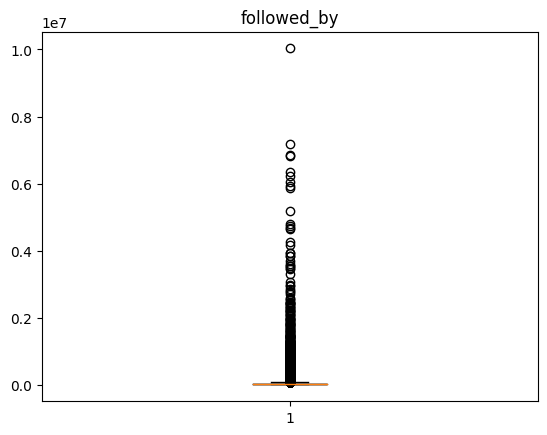

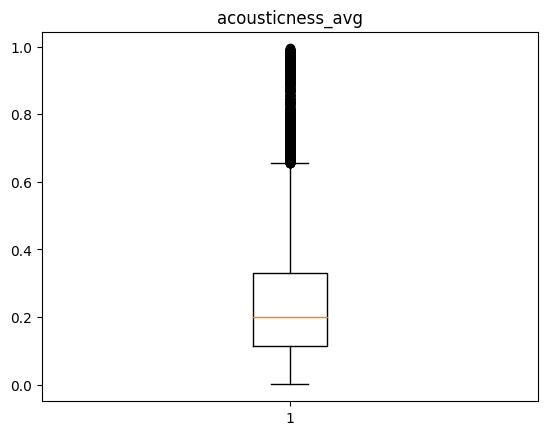

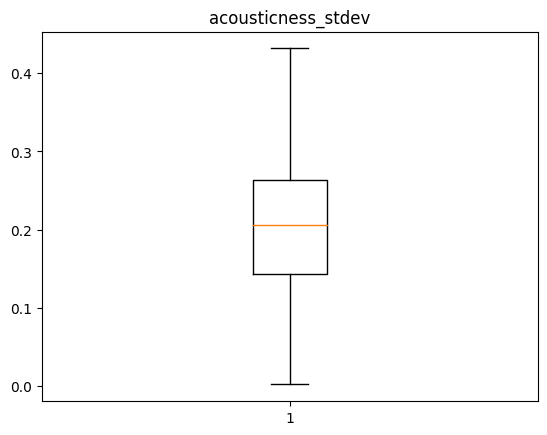

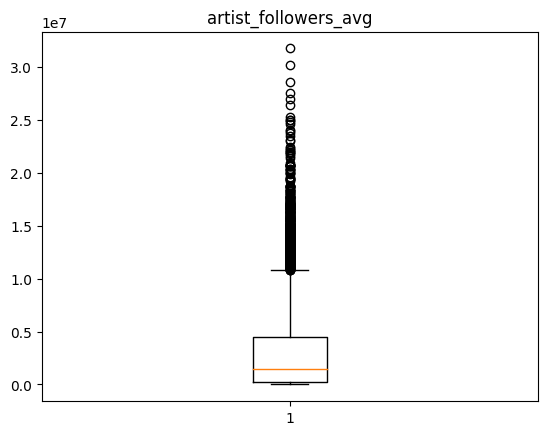

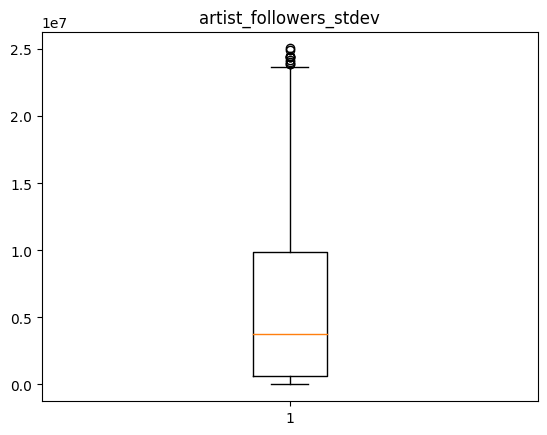

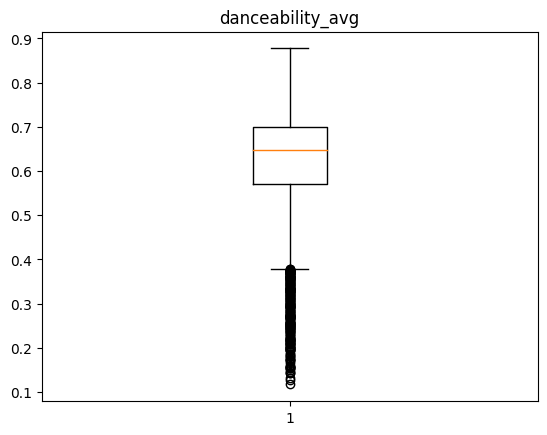

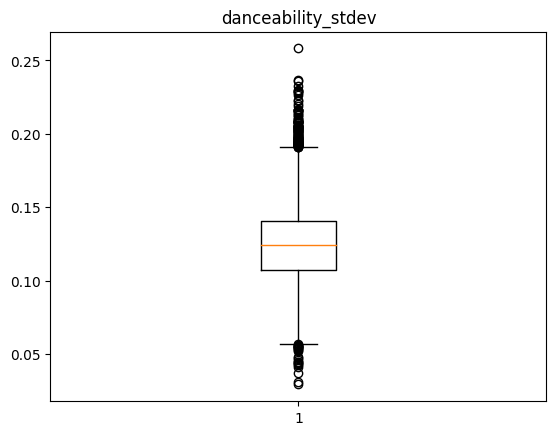

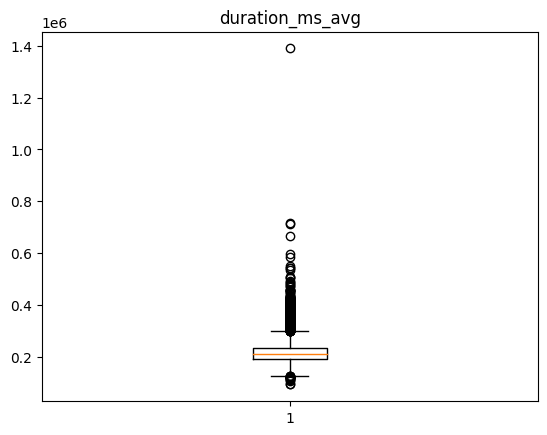

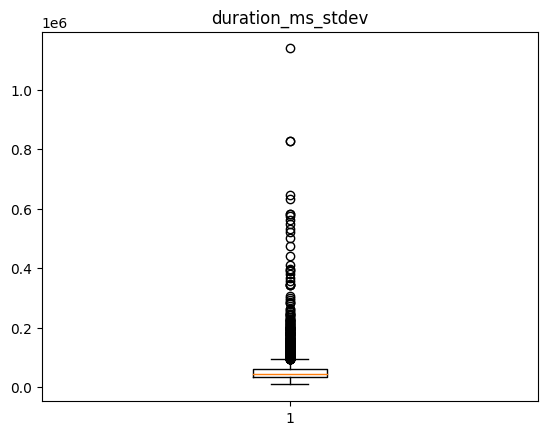

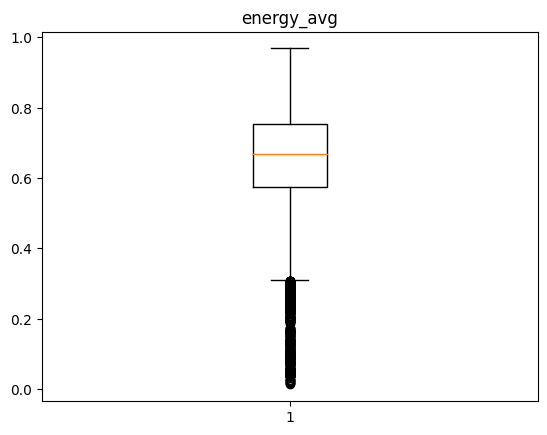

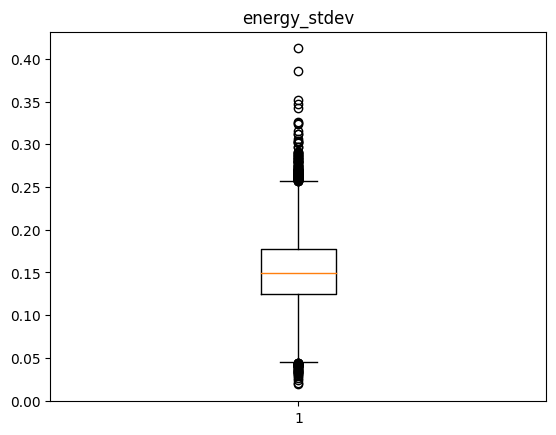

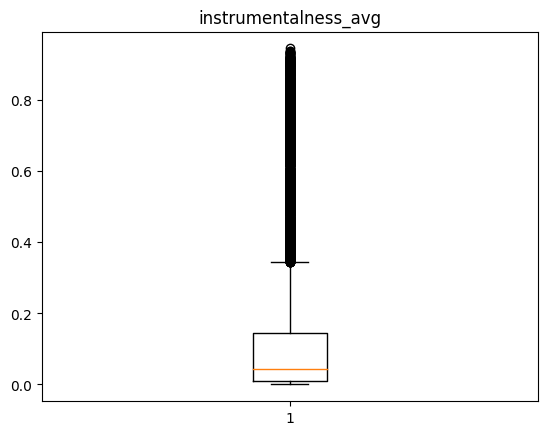

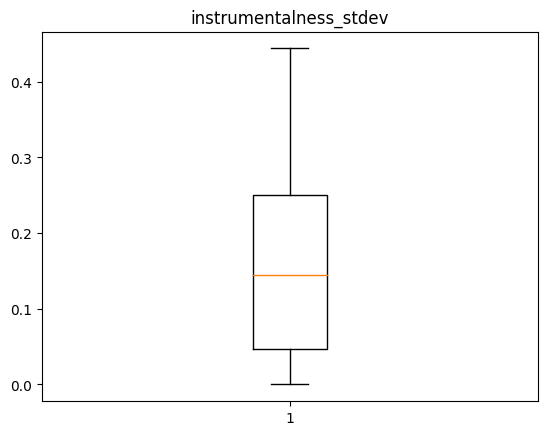

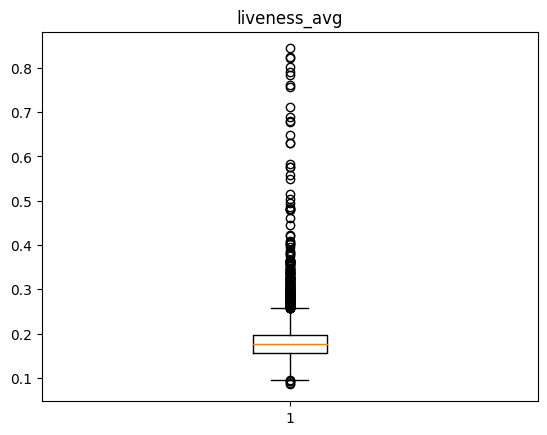

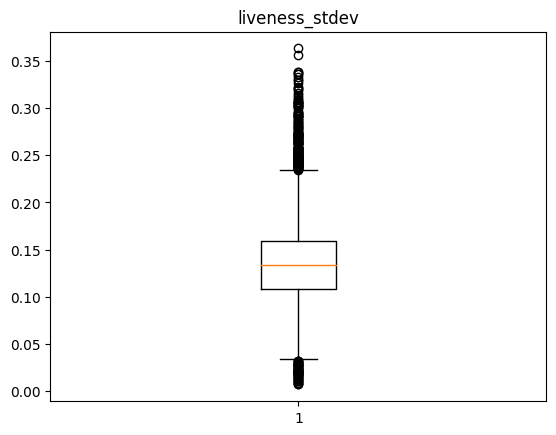

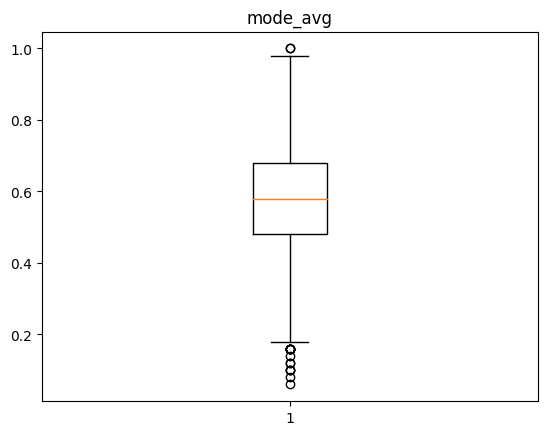

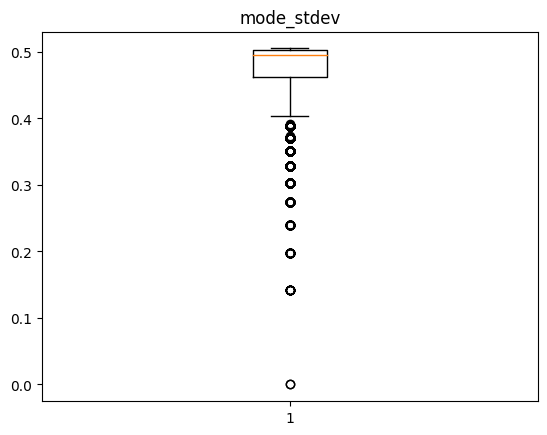

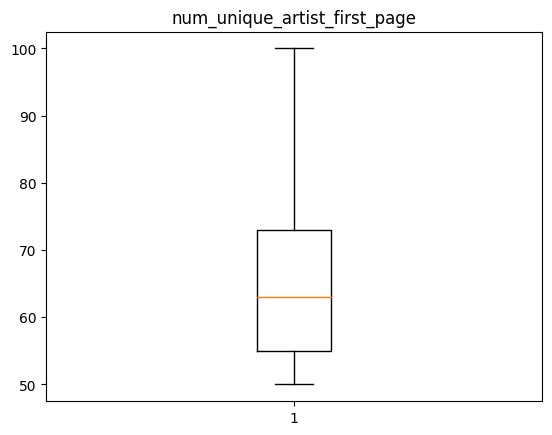

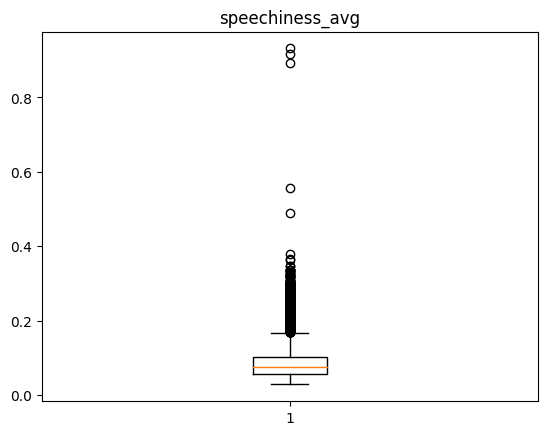

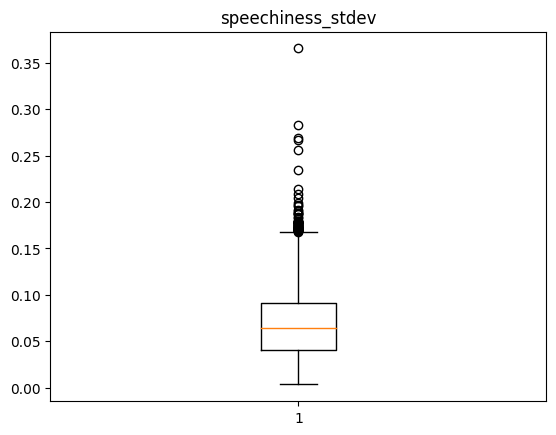

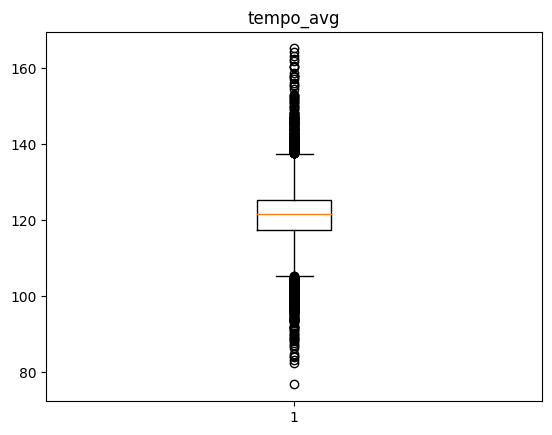

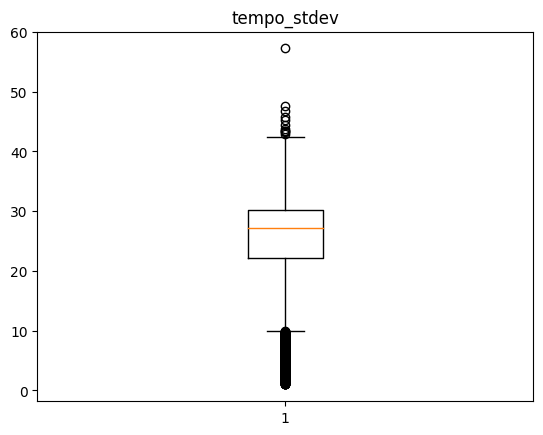

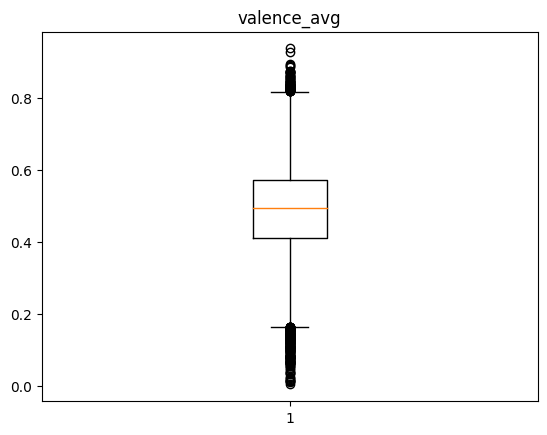

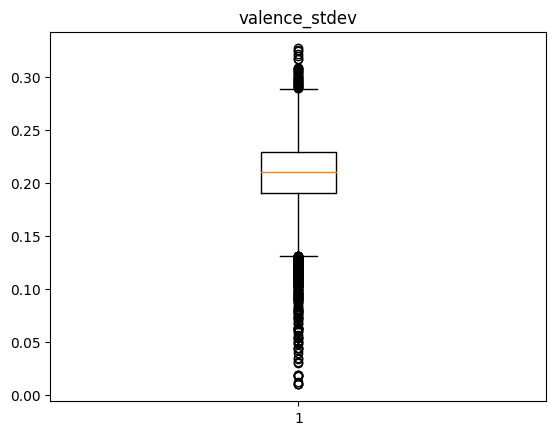

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
num_cols = df_numeric.columns.to_list()
for col in num_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(df_numeric[col])  
    ax.set_title(col)


In [14]:
def remove_outliers(df, num_cols):
    """Remove outliers from the dataframe and return a dataframe

    Keyword arguments:
    df -- dataframe
    num_cols -- lists of numerical columns
    """
    result_df = df.copy()
    for cols in num_cols:
        Q1 = result_df[cols].quantile(0.02)
        Q3 = result_df[cols].quantile(0.98)
        IQR = Q3 - Q1
        result_df = result_df[~(
            (result_df[cols] < (Q1 - 1.5 * IQR)) | (result_df[cols] > (Q3 + 1.5 * IQR)))]
    return result_df

Shape of dataframe:  (12534, 26)


/var/folders/70/r8svw2794r580zf43rn63z6r0000gq/T/ipykernel_42953/2246953458.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


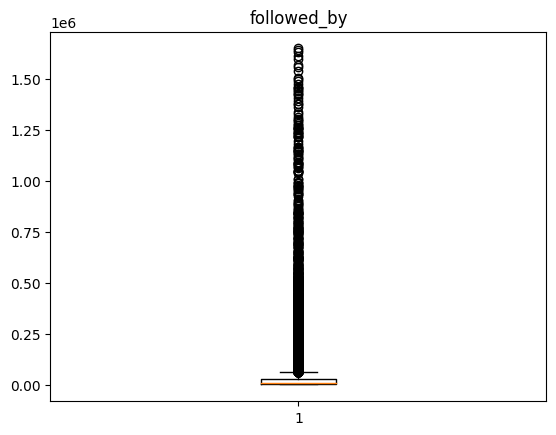

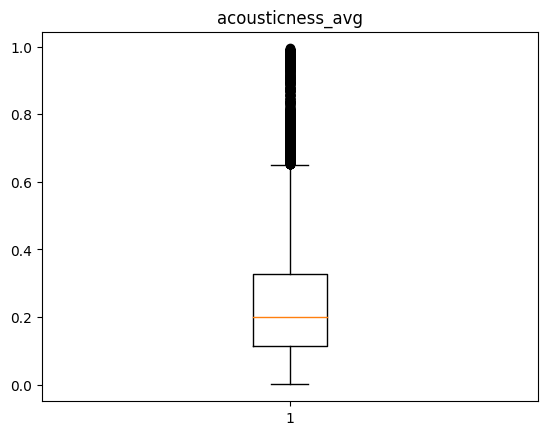

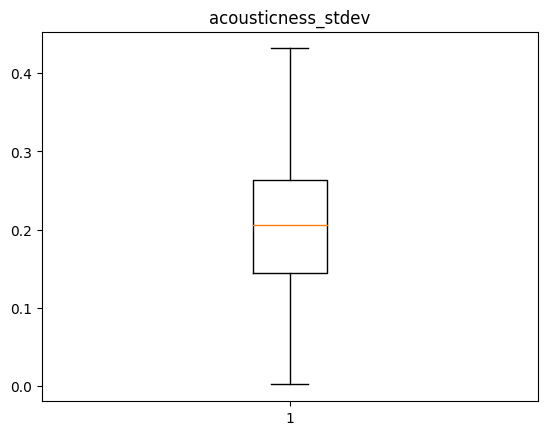

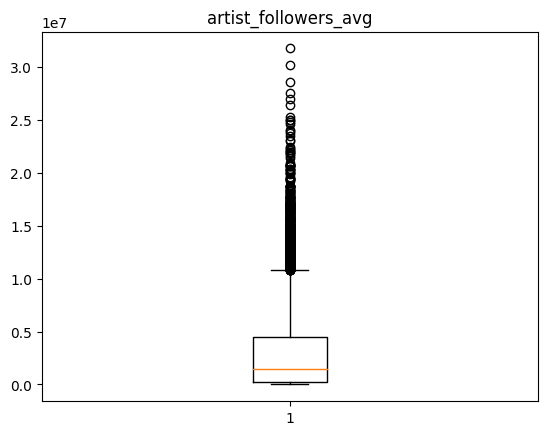

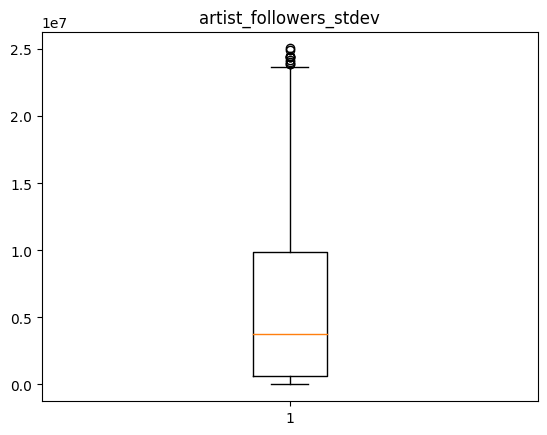

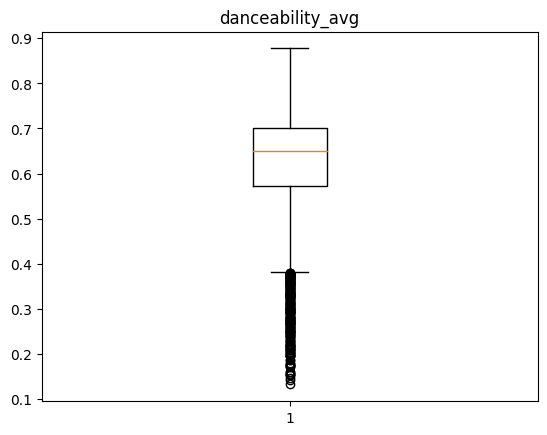

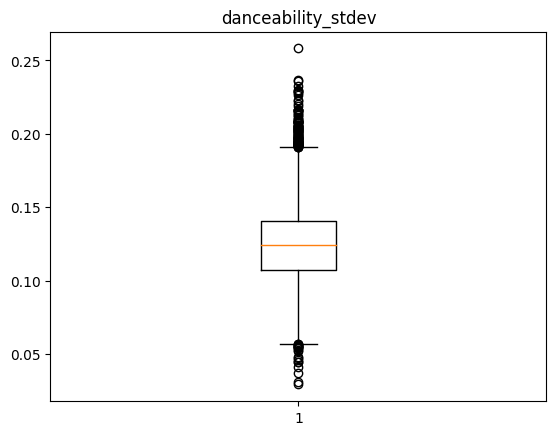

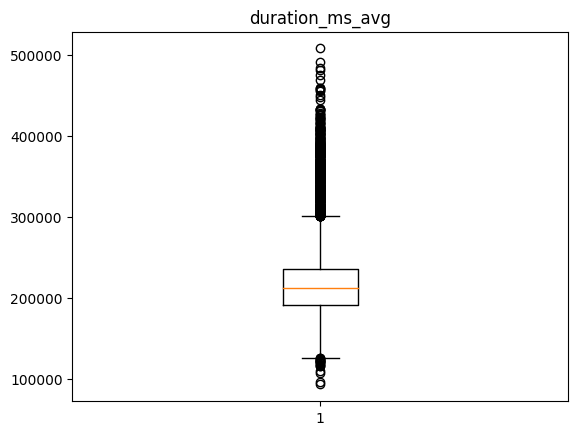

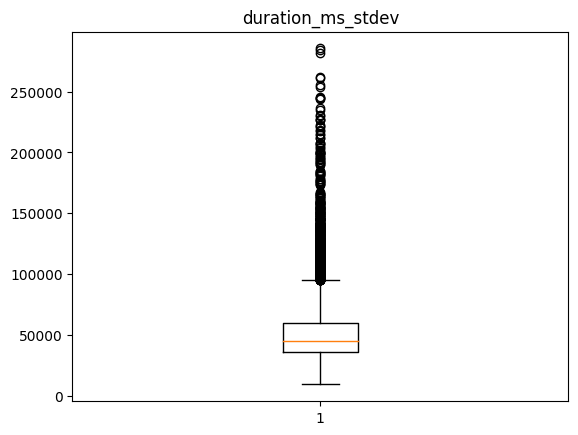

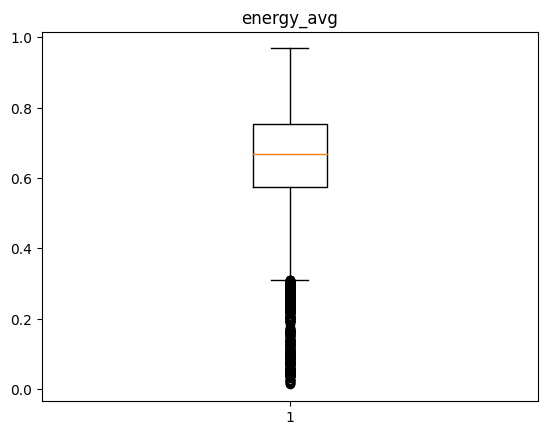

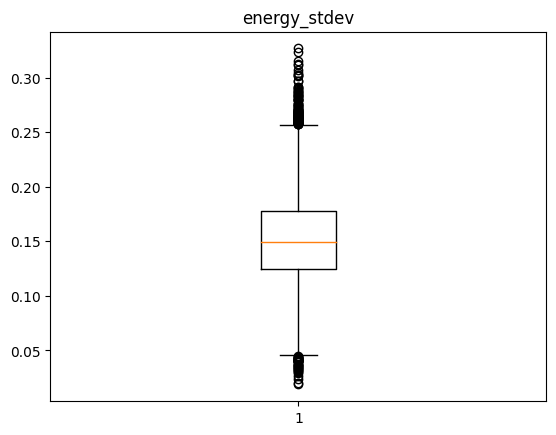

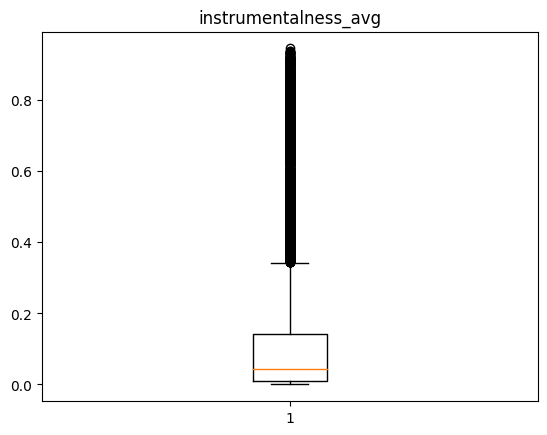

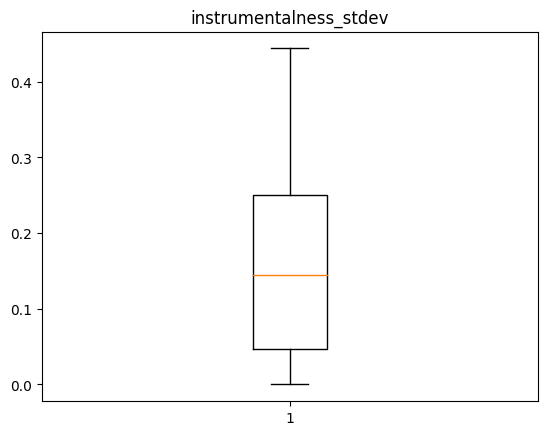

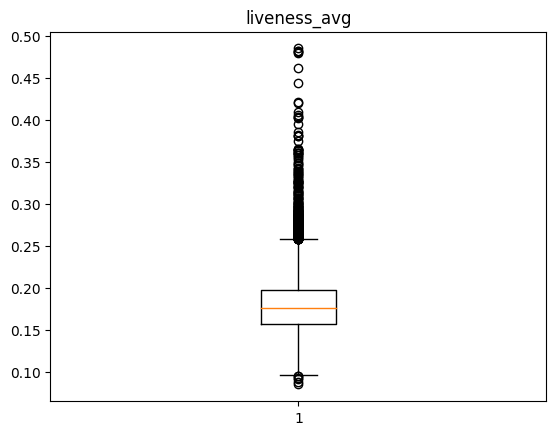

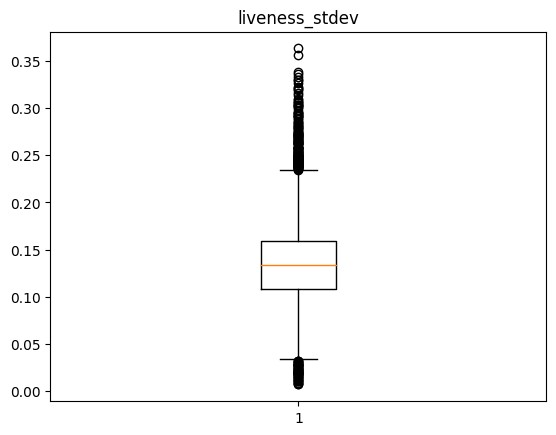

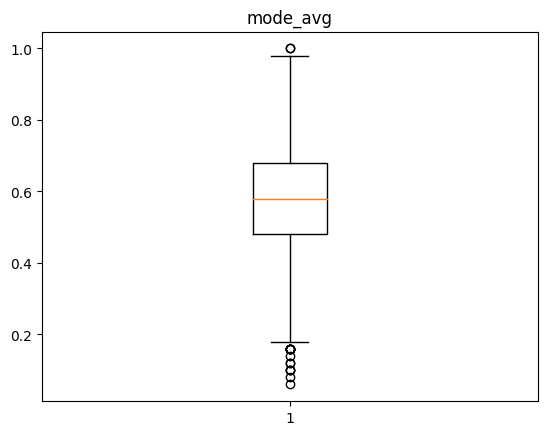

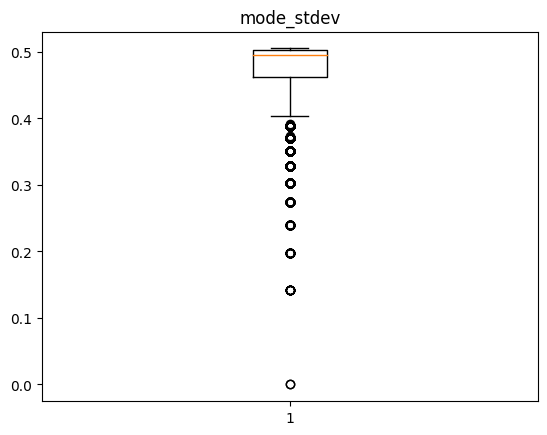

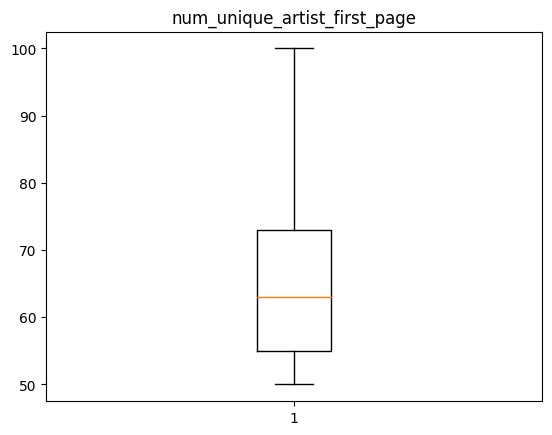

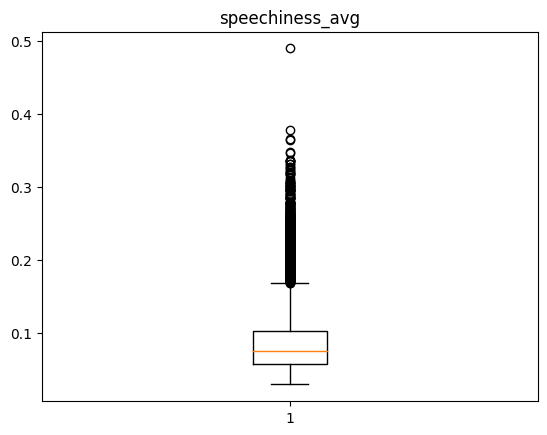

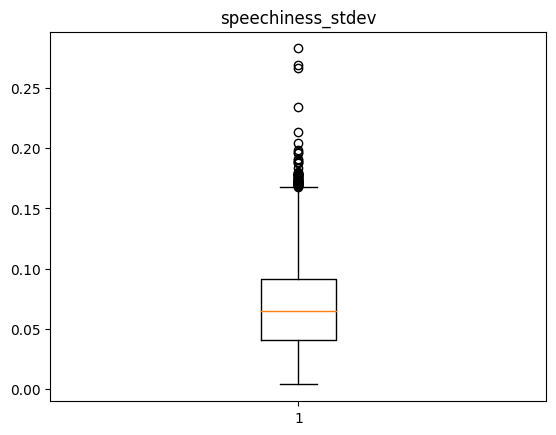

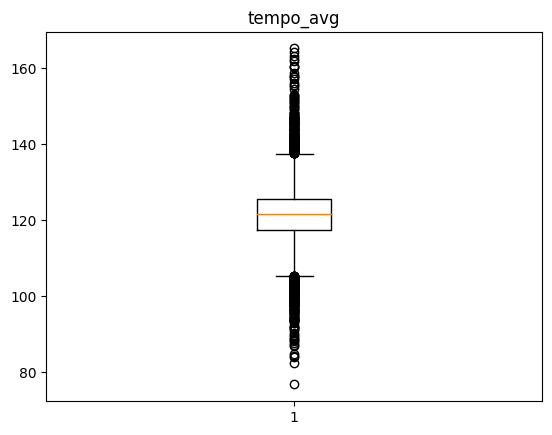

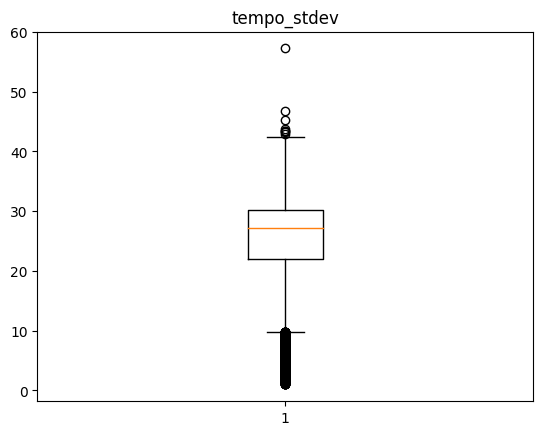

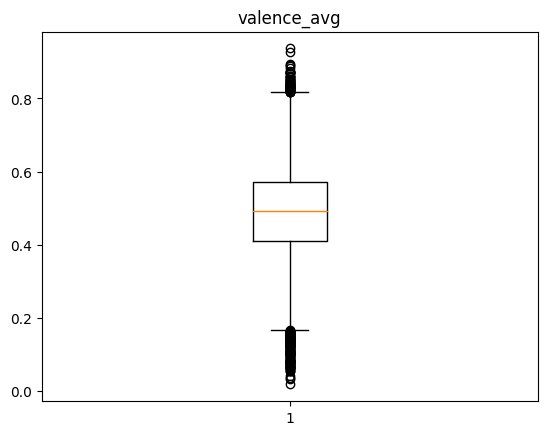

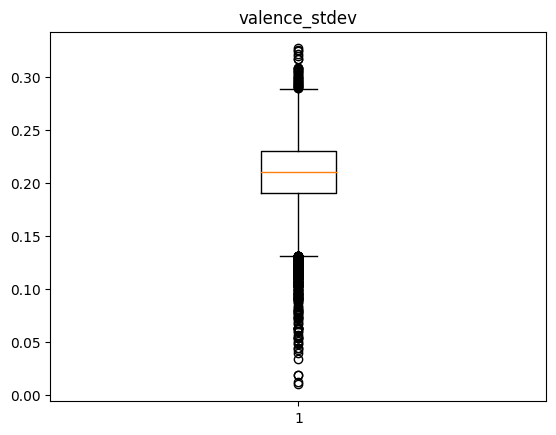

In [15]:
df_remove_outlier = remove_outliers(df, num_cols)
print("Shape of dataframe: ", df_remove_outlier.shape)

for col in num_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(df_remove_outlier[col])  
    ax.set_title(col)